In [433]:
"""username = "nova"
pathtorepo = "/home/nova/work/repo_ds/dynamical-systems"
using Pkg
Pkg.activate(pathtorepo * "/env/integrate/")

using StaticArrays, DifferentialEquations, DynamicalSystems, IntervalRootFinding 
using CairoMakie, GLMakie

include("/home/nova/work/repo_ds/dynamical-systems/system.jl")
include("/home/nova/work/repo_ds/dynamical-systems/visual.jl")"""

  Activating project at `~/work/repo_ds/dynamical-systems/env/integrate`


plot_3d_2c_fp (generic function with 1 method)

In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

using StaticArrays, DifferentialEquations, DynamicalSystems, IntervalRootFinding 
using CairoMakie, GLMakie

include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\system.jl");
include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\visual.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
time = 3000.0; tt = 0.0; tstep = 0.001;
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [3]:
u0 = [0.9445509341100914, 0.74116702856987, 0.7361196042973006, 0.0646914552140727, 0.15145764079879162, 0.0009327645775731449]
param = TM6_glial_ECM_get_params();
dict, indexparams = TM6_glial_ECM_help(param);
println(indexparams);


    τ - 1, τD - 2, τF - 3, τy - 4, α - 5, αE - 6, αecm - 7, αp - 8,
    J - 9, U0 - 10, I0 - 11, ΔU0 - 12, β - 13, βecm  -14, βp - 15,
    γp - 16, ecm0 - 17, ecm1 - 18, kecm - 19, θecm - 20, p0 - 21, p1 - 22, θp - 23, kp - 24, ythr - 25, xthr - 26


In [4]:
param[11] =  -1.741;
param[6] = 0.067;

In [5]:
ds= CoupledODEs(TM6_glial_ECM, u0, param, diffeq = integ_set);
tr, trange = trajectory(ds, time, Δt = tstep);

In [6]:
Er = interval(0.0, 30.0);
xr, ur, yr = interval(-1.0, 1.0), interval(-1.0, 1.0), interval(-1.0, 1.0);
ecmr, pr = interval(-1.0, 1.0), interval(-1.0, 1.0);
box = IntervalBox(Er, xr, ur, yr, ecmr, pr);

fp, eigs, stable = fixedpoints(ds, box, TM6_glial_ECM_jac, tol = 1e-15, method = IntervalRootFinding.Krawczyk);
println("Number of fp:", length(fp));

Number of fp:3


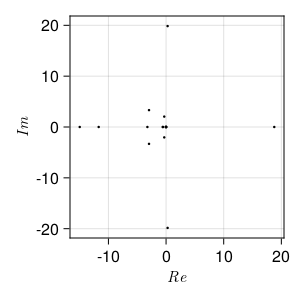

CairoMakie.Screen{IMAGE}


In [7]:
width_ = 300; height_ = 300;
CairoMakie.activate!();
f = Figure(resolution = (width_, height_) );
ax = Axis(f[1, 1], xlabel = L"Re", ylabel = L"Im");
for index in range(1, length(eigs), step = 1)
    Re = real(eigs[index]);
    Im = imag(eigs[index]);
    scatter!(Re, Im, markersize = 3.5, color = :black);
end
display(f)

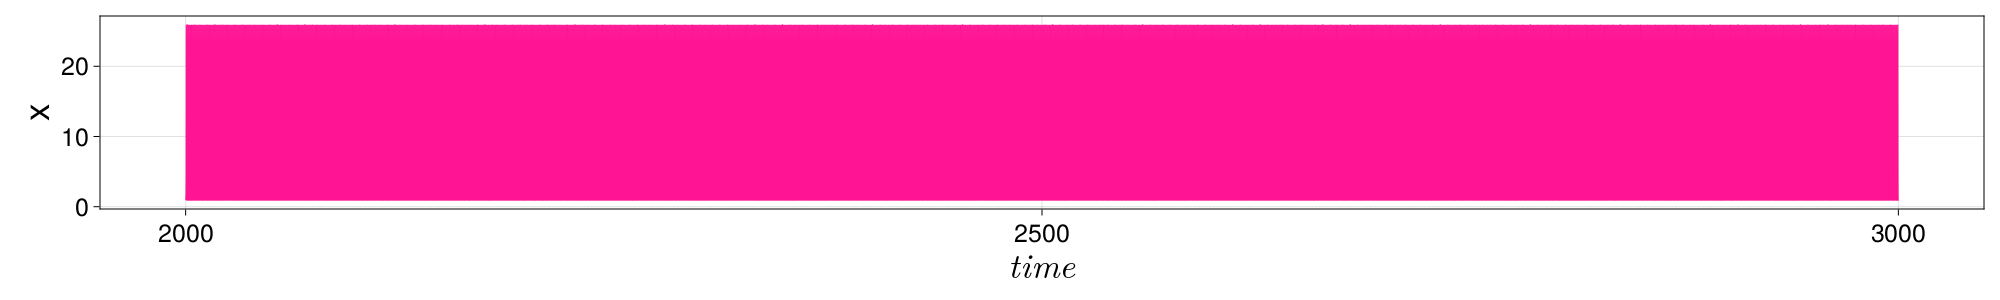

CairoMakie.Screen{IMAGE}


In [8]:
plot_timesereis(trange, tr[:, 1], 2000000, 3000000, width = 2000, height = 300, inter=false, lw = 1.0, color = :deeppink)

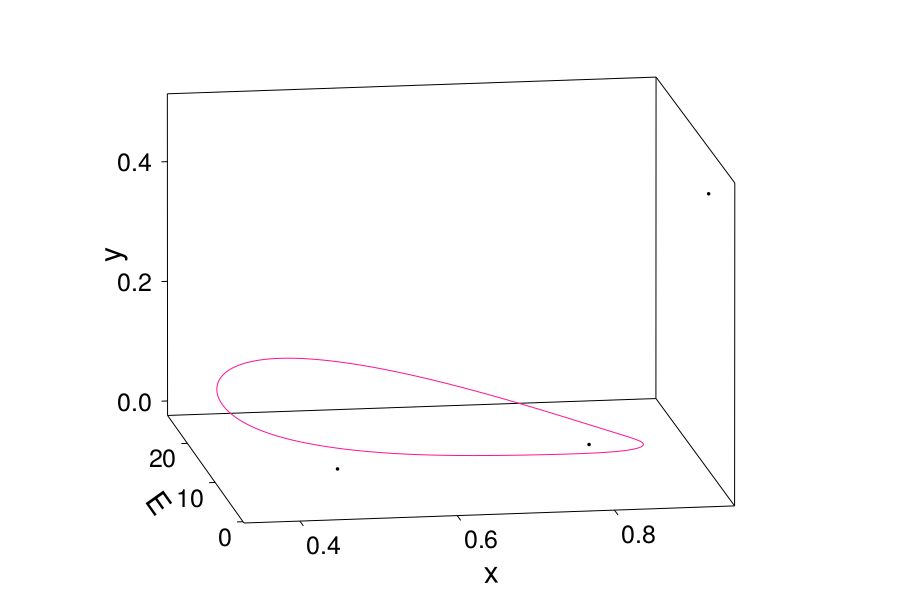

CairoMakie.Screen{IMAGE}


In [9]:
idx, idy, idz = 2, 1, 4
data = [ tr[:, idx], tr[:, idy], tr[:, idz] ]
plot_3d_fp(data, [fp, idx, idy, idz], 1000000, 3000000; prot = 60, azim = -0.55pi, elev = 0.07pi,  xl = "x", yl = "E", zl = "y", lw = 1.0, color = :deeppink)